## Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Read the CSV File

In [5]:
df = pd.read_csv("gemstone.csv")

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


##### We don't need the id column, so drop it

In [8]:
df = df.drop(labels = ["id"], axis = 1)

In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


### Dropping dimentionless features from columns x, y, and z

In [11]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(193563, 10)

### Eliminating the outliers from depth, table, y and z columns 

In [13]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(193561, 10)

### Let us split the dataset into X(features) and y(labels)

In [15]:
X = df.drop(labels=["price"], axis=1)
y = df[["price"]]

### We can change the columns CUT, COLOR, Clarity from qualitative into numerical, by using LabelEncoder

In [17]:
label_encoder = LabelEncoder()
##X["cut", "color", "clarity"] = label_encoder.fit_transform(X["cut", "color", "clarity"]) it doesn't work altogether
X["cut"] = label_encoder.fit_transform(X["cut"])
X["color"] = label_encoder.fit_transform(X["color"])
X["clarity"] = label_encoder.fit_transform(X["clarity"])

In [18]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77


### To scale the values, we use MinMaxScaler in the dataset

In [20]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
scaled_label = scaler.fit_transform(y)

### Reshape the data for CNN: (samples, height, width, channels)

In [22]:
X_reshaped = scaled_features.reshape(-1, 3, 3, 1)

### Divide the data into train and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, scaled_label, test_size=0.15, random_state=42)

### Define the model structure

In [26]:
model =  Sequential()
model.add(Input(shape=(3,3,1)))

# Adjust kernel size or remove max pooling to prevent shrinking
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))
# You can consider removing pooling for very small inputs
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer= Adam(),
             loss= "mse",
             metrics=["mae"])

history = model.fit(X_train, y_train, epochs=20, batch_size=30, validation_split=0.2)

Epoch 1/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0043 - mae: 0.0364 - val_loss: 0.0017 - val_mae: 0.0252
Epoch 2/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0015 - mae: 0.0221 - val_loss: 0.0012 - val_mae: 0.0184
Epoch 3/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0013 - mae: 0.0203 - val_loss: 0.0012 - val_mae: 0.0185
Epoch 4/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0012 - mae: 0.0194 - val_loss: 0.0011 - val_mae: 0.0187
Epoch 5/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0012 - mae: 0.0187 - val_loss: 0.0011 - val_mae: 0.0177
Epoch 6/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0011 - mae: 0.0186 - val_loss: 0.0012 - val_mae: 0.0210
Epoch 7/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0011 - mae: 0.0182 - val_loss: 0.0011 - val_mae: 0.0176
Epoch 8/20
4388/4388 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.0011 - mae: 0.0181 - val_loss: 0.0012 - val_mae: 0.0189
Epoch 9/20
4388/4388 ━━━━━━━━━━━━━━━━━━━

In [27]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Loss : {loss}")
print(f"MAE : {mae}")

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - loss: 0.0012 - mae: 0.0186
Loss : 0.0011615670518949628
MAE : 0.018468722701072693


In [28]:
predictions = model.predict(X_test)

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step


### Scale back the normalized values

In [30]:
scaledback_predictions = scaler.inverse_transform(predictions)
scaledback_labels = scaler.inverse_transform(y_test)

for i in range(6):
    print("Actual price:", scaledback_labels[i])
    print("Predicted price:", scaledback_predictions[i])

Actual price: [473.]
Predicted price: [482.5921]
Actual price: [15984.]
Predicted price: [14744.077]
Actual price: [14844.]
Predicted price: [15522.348]
Actual price: [1260.]
Predicted price: [1520.7169]
Actual price: [1334.]
Predicted price: [1257.2878]
Actual price: [491.]
Predicted price: [519.2032]


### Plot the performances

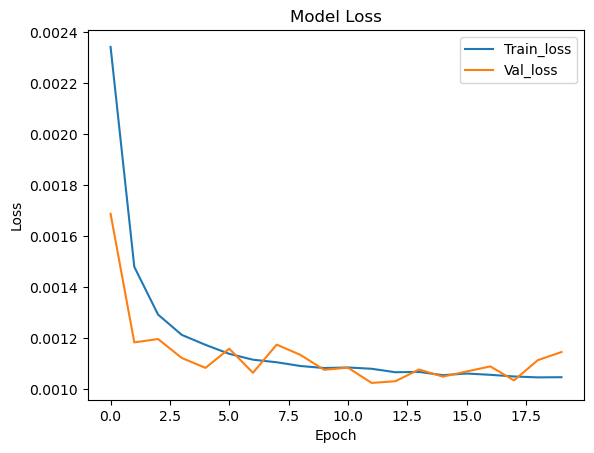

In [32]:
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

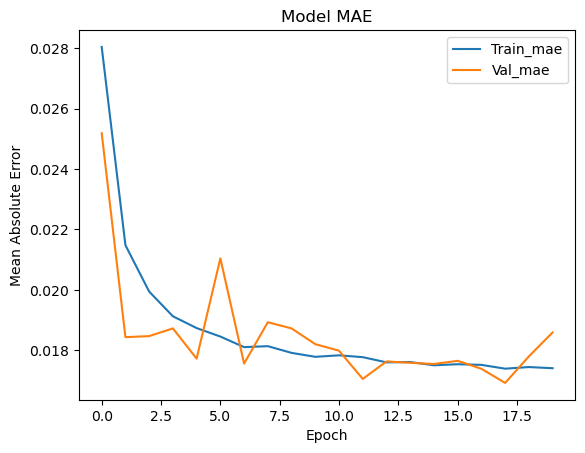

In [33]:
plt.plot(history.history['mae'], label='Train_mae')
plt.plot(history.history['val_mae'], label='Val_mae')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()